<h1 align = 'center'> Heart Attack Analysis And Prediction </h1>

## Project Content
1. [Introdction](#1)

    *1.1 [topic](#2)

## Introduction <a id=1></a>

### Variable Description
- Age: age in years<br />
- Sex: Sex of the patient<br />
    - Value 1: male<br />
    - Value 0: female<br />
- exang: exercise induced angina<br />
    - Value 1: yes<br />
    - Value 0: no<br />
- ca: number of major vessels (0-3)<br />
- cp: Chest Pain type chest pain type<br />
    - Value 1: typical angina<br />
    - Value 2: atypical angina<br />
    - Value 3: non-anginal pain<br />
    - Value 4: asymptomatic<br />
- trtbps: resting blood pressure (in mm Hg)<br />
- chol: cholestoral in mg/dl fetched via BMI sensor<br />
- fbs: (fasting blood sugar > 120 mg/dl)<br />
    - Value 1: true<br />
    - Value 0: false<br />
- restecg: resting electrocardiographic results<br />
    - Value 0: normal<br />
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br />
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br />
- thalach: maximum heart rate achieved<br />
- thal: Thalium Stress Test result<br />
- num: the predicted attribute - diagnosis of heart disease (angiographic disease status)<br />
    - Value 1: > 50% diameter narrowing<br />
    - Value 0: < diameter narrowing<br />
- slope: the slope of the peak exercise ST segment<br />
    - Value 1: flat<br />
    - Value 2: upsloping<br />
    - Value 0: downsloping<br />
- target: <br />
    - Value 1: more chance of heart attack<br />
    - Value 0: less chance of heart attack<br />

## Exploratory Data Analysis
### Required Libraries

In [229]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# disables the display of warnings
import warnings
warnings.filterwarnings("ignore")

### Import Dataset

In [230]:
url = "https://raw.githubusercontent.com/audrey-rw5683/HeartAttackPrediction/main/heart.csv"
heart = pd.read_csv(url)
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Wrangling

In [231]:
# rename colunms
heart.columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
heart.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [232]:
# display dataset properties
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Check missing and unique values

In [233]:
# check missing values
heart[heart['thal'] == 0]
heart['thal'] = heart['thal'].replace(0,np.nan)

isnull_number = []
for i in heart.columns:
    x = heart[i].isnull().sum()
    isnull_number.append(x)
pd.DataFrame(isnull_number, index = heart.columns, columns=['Total missing values'])

,Total missing values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [234]:
heart[heart['thal'].isnull()]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [235]:
heart['thal'].fillna(2, inplace=True)
heart['thal'] = pd.to_numeric(heart['thal'], downcast= 'integer')
heart.loc[[48,281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


Text(0.5, 1.0, 'Examing missing values')

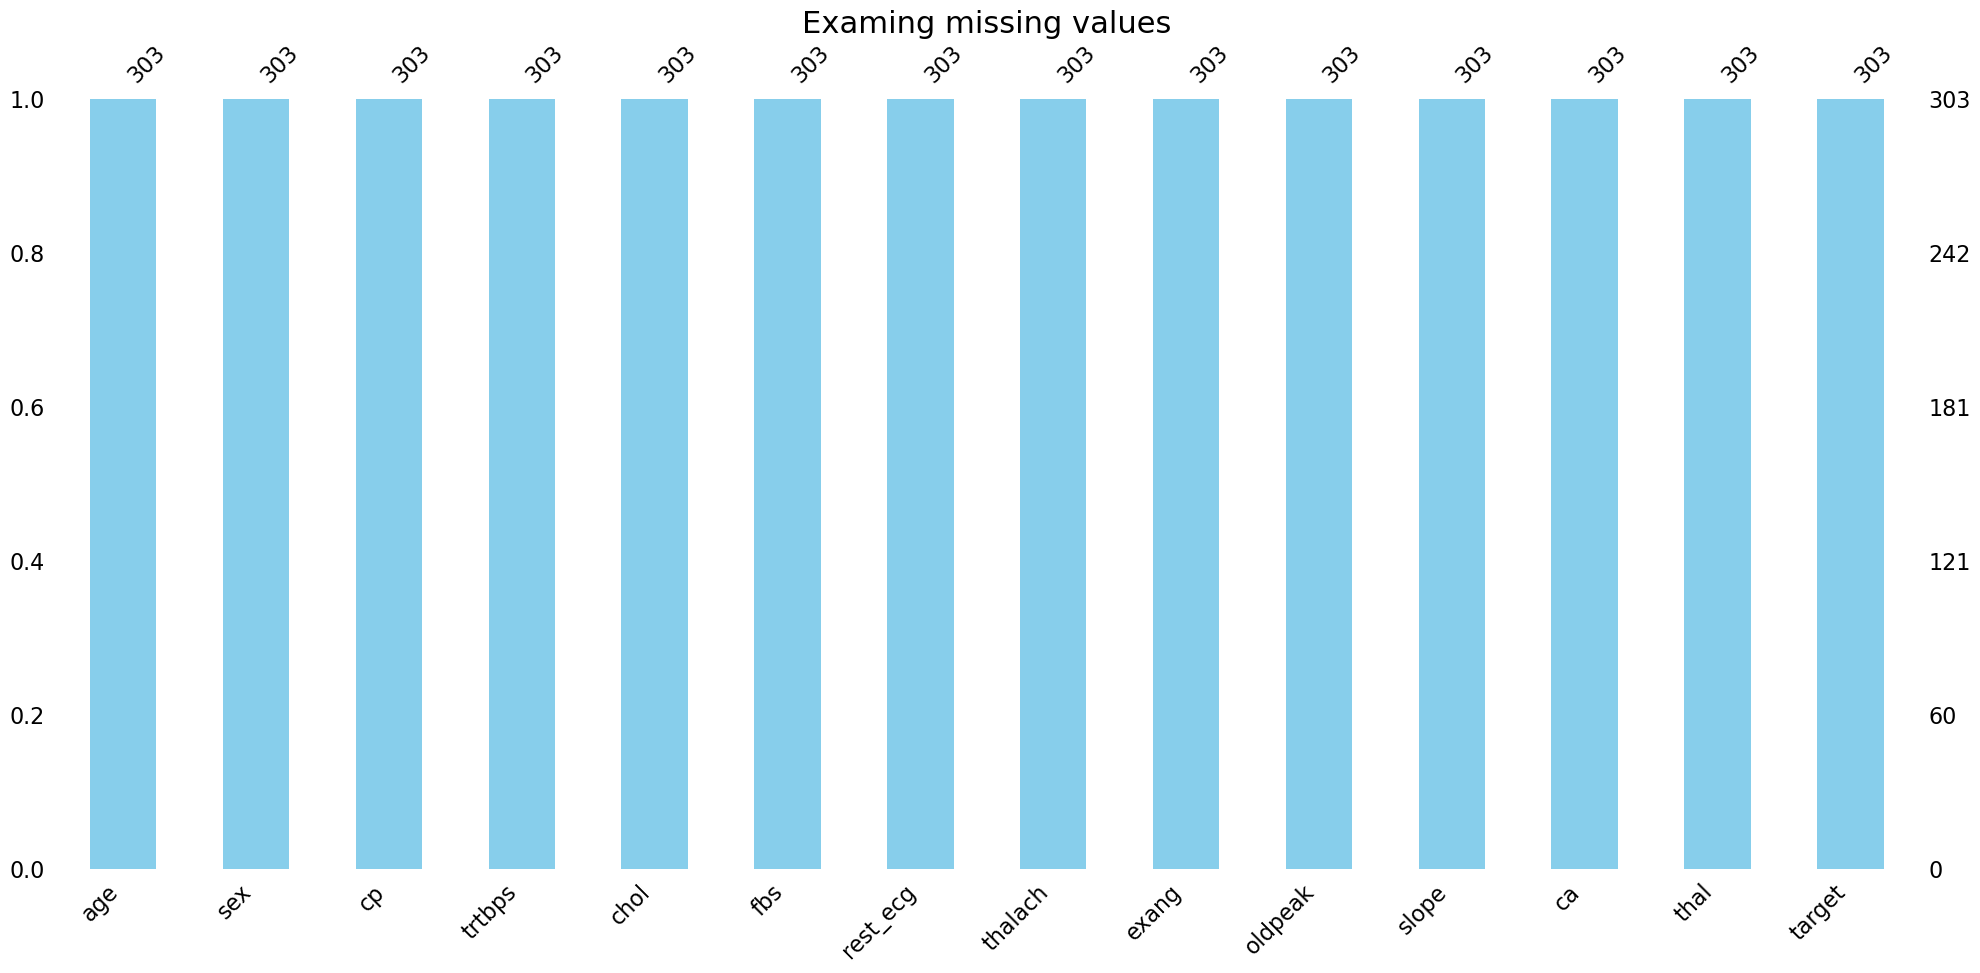

In [236]:
msno.bar(heart, color = 'skyblue').set_title('Examing missing values',fontsize=22)

In [237]:
# check unique values
unique_number = []
for i in heart.columns:
    x = heart[i].value_counts().count()
    unique_number.append(x)
pd.DataFrame(unique_number, index = heart.columns, columns=['Total number of unique values'])

,Total number of unique values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


### Findings

### Statistics of variables
#### Numeric Variables

In [238]:
# separate variables into numeric and categorical variables
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

In [239]:
heart[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


<Figure size 400x300 with 0 Axes>

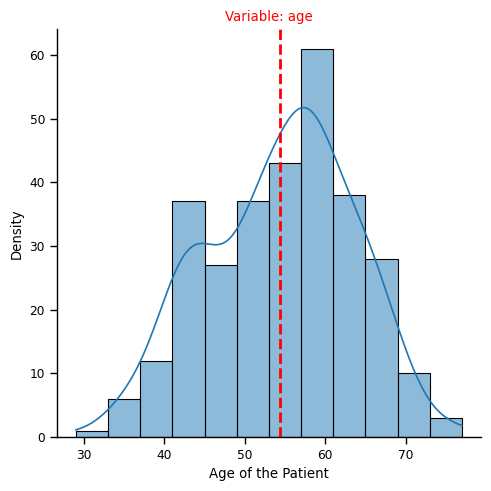

<Figure size 400x300 with 0 Axes>

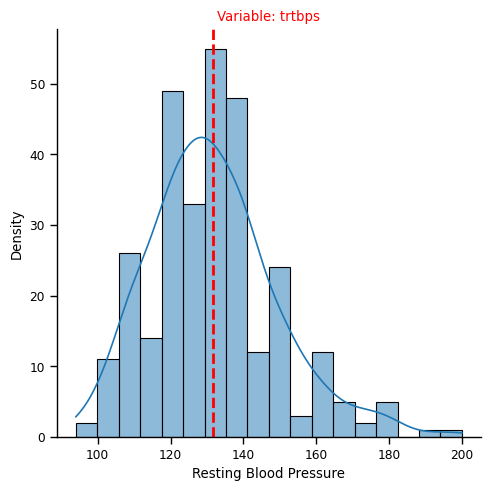

<Figure size 400x300 with 0 Axes>

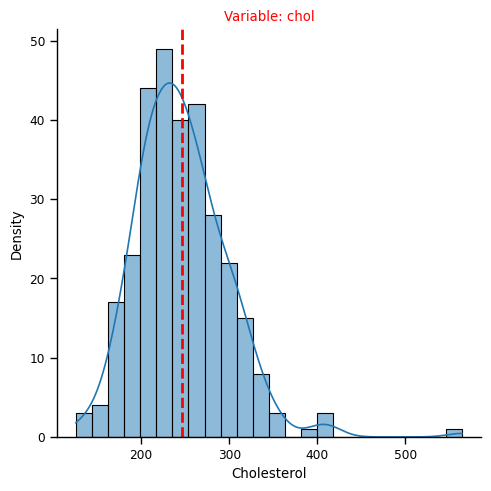

<Figure size 400x300 with 0 Axes>

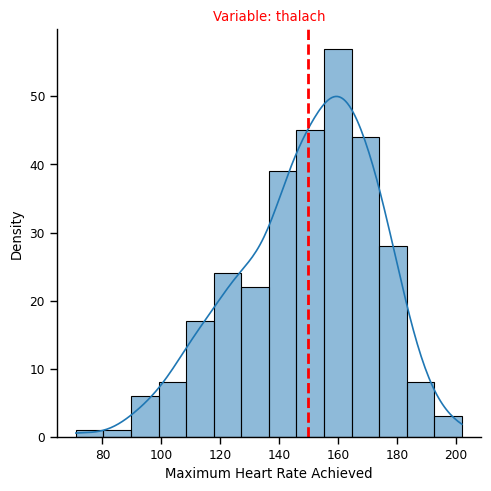

<Figure size 400x300 with 0 Axes>

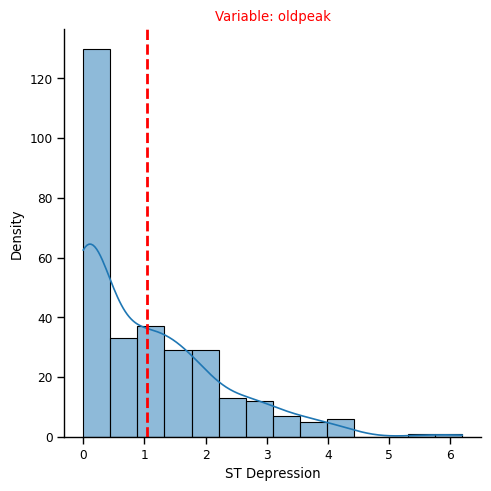

In [240]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]
list(zip(numeric_var, numeric_axis_name))
for n, m in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (4, 3))
    sns.displot(heart[n], kde = True)
    plt.axvline(heart[n].mean(), color='red', linestyle='--', linewidth=2)
    plt.title('Variable: ' + n, color='red')
    plt.xlabel(m)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

#### Categorical Variables

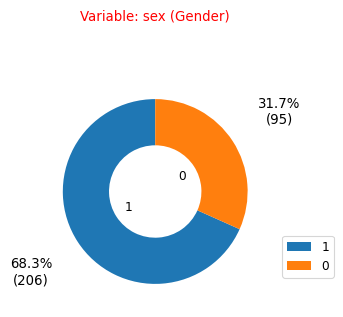

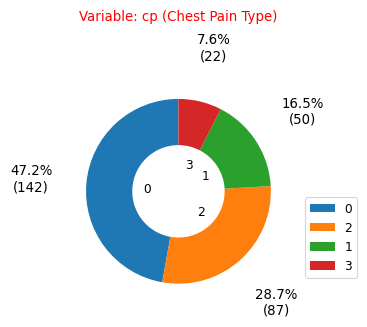

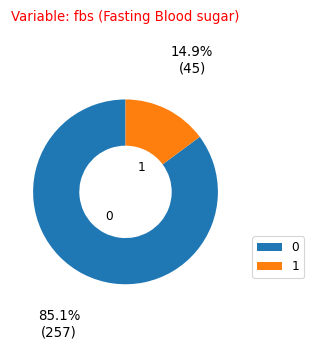

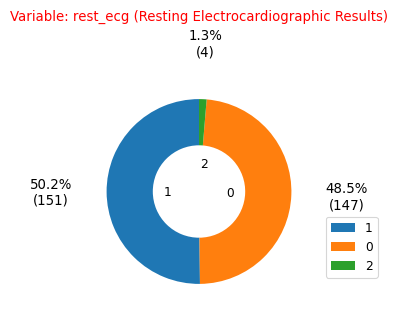

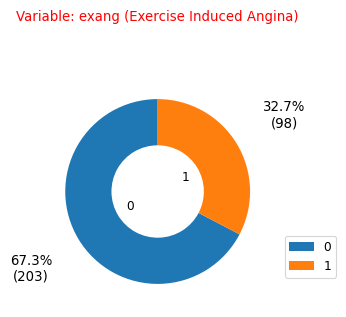

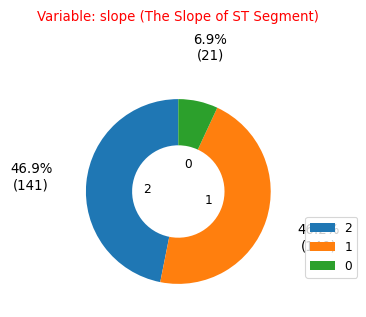

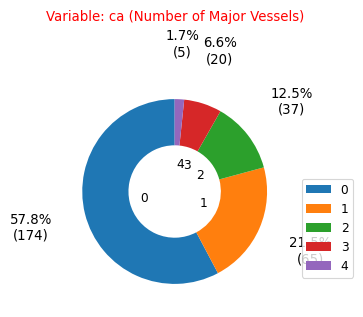

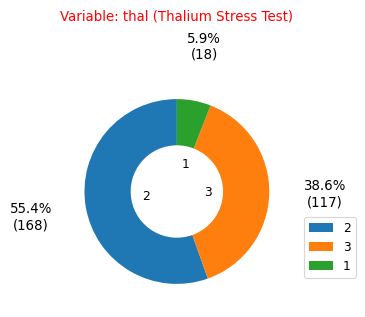

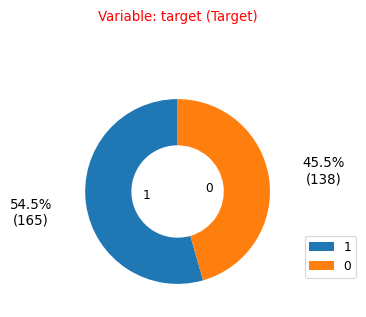

In [241]:
def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results", 
                       "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thalium Stress Test", "Target"]
list(zip(categoric_var, categoric_axis_name))
for j, k in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize = (3, 3))
    observation_values = list(heart[j].value_counts().index)
    total_observation_values = list(heart[j].value_counts())
    plt.pie(total_observation_values, labels=observation_values, autopct=lambda pct: func(pct, total_observation_values), 
            startangle=90, wedgeprops={'width': 0.5}, pctdistance=1.6, labeldistance=0.3)
    plt.title('Variable: ' + j + " (" + k + ")", color='red', pad=40)
    plt.legend(loc='lower right',bbox_to_anchor=(1.3, 0.1))
    plt.show()

### Relations between variables
#### With Target Variable

In [242]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
numeric_var.append("target")
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

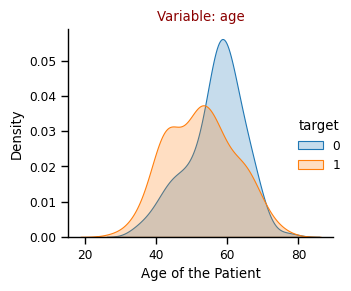

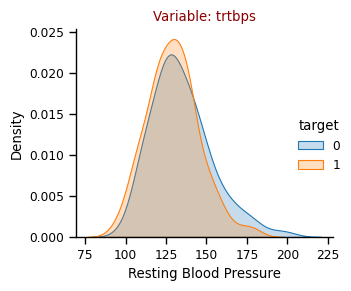

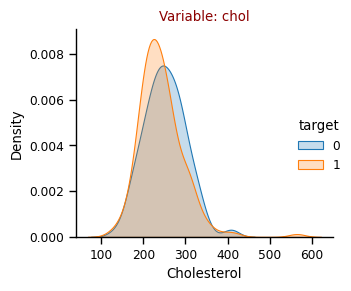

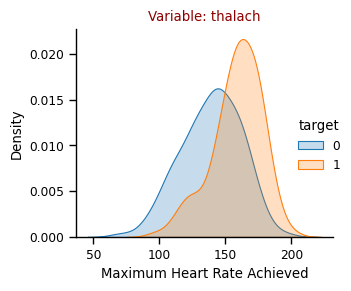

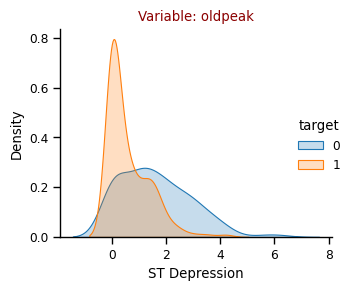

In [243]:
for n, m in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(heart[numeric_var], hue = "target", height = 3)
    graph.map(sns.kdeplot, n, shade = True)
    graph.add_legend()
    plt.title('Variable: ' + n, color='darkred')
    plt.xlabel(m)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

In [244]:
heart[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [245]:
heart[numeric_var].corr().iloc[:, [-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


#### Among themselves

In [246]:
numeric_var
numeric_var.remove('target')
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

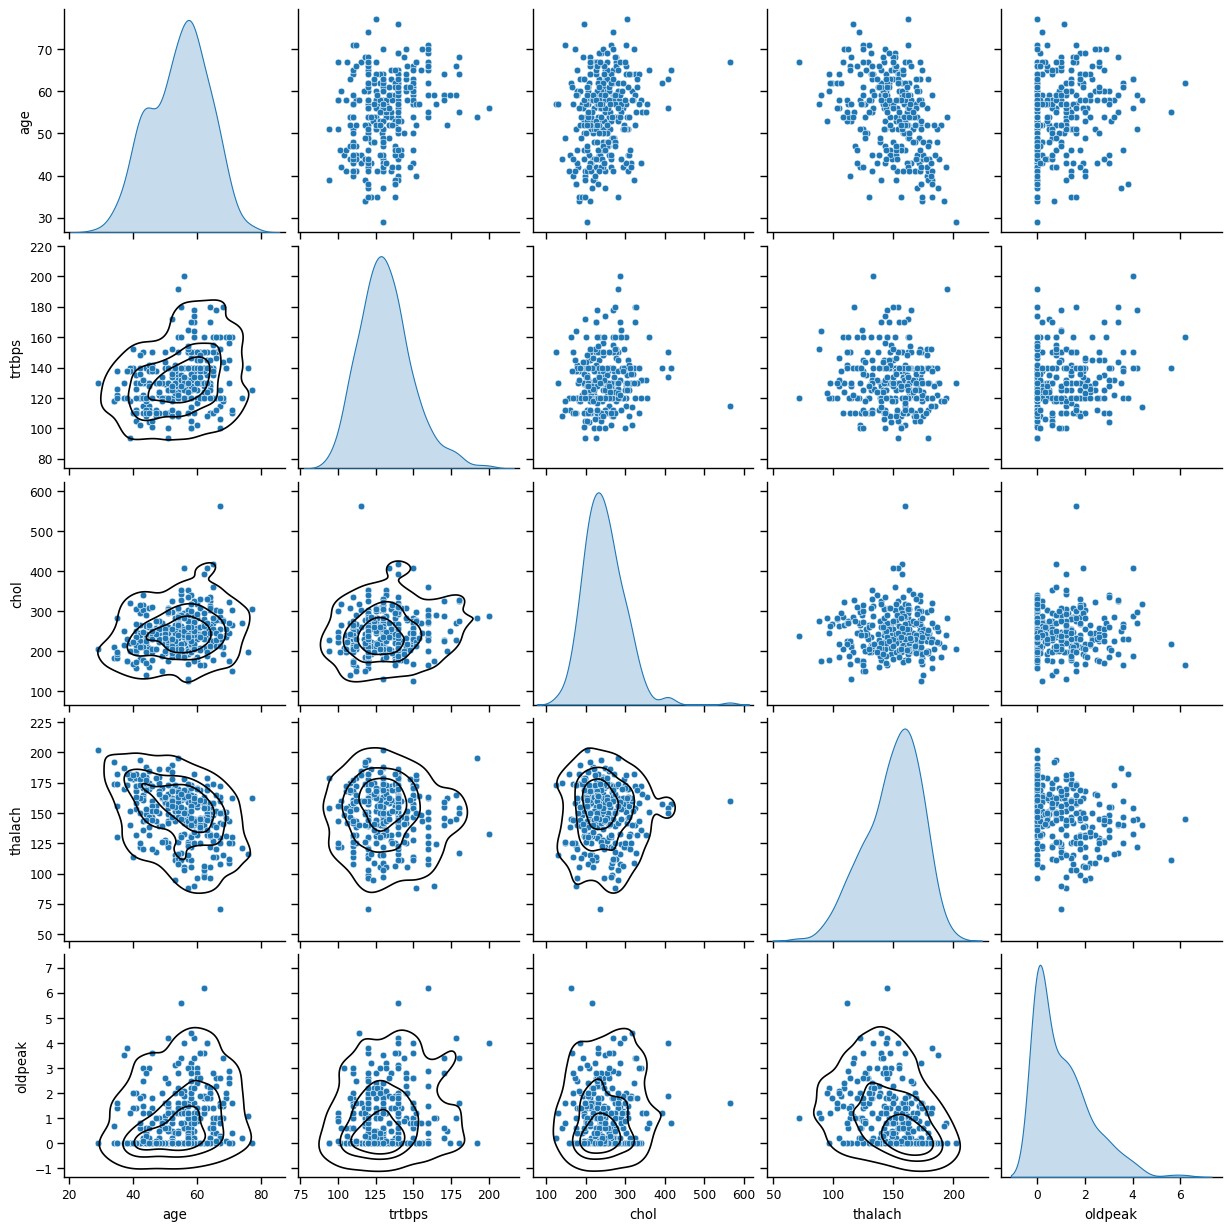

In [250]:
graph = sns.pairplot(heart[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = 'black')

### Categorical variables

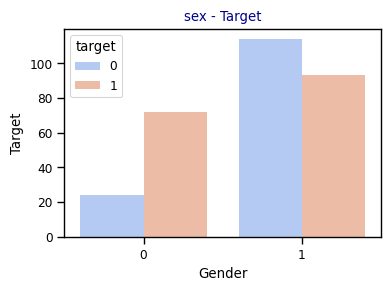

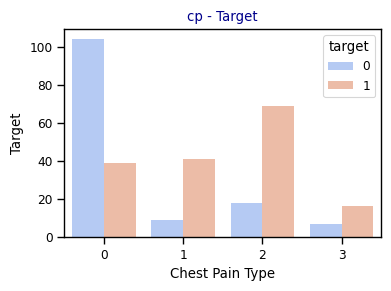

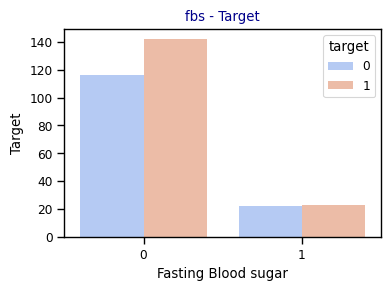

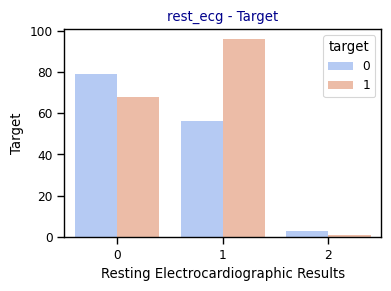

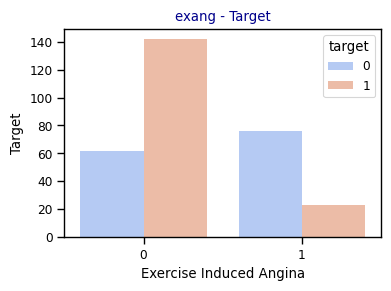

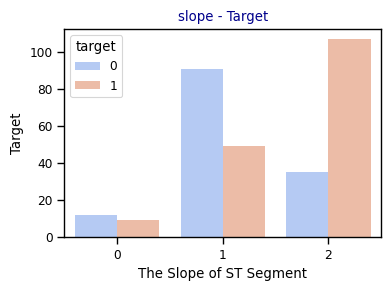

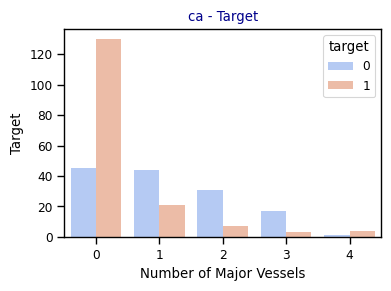

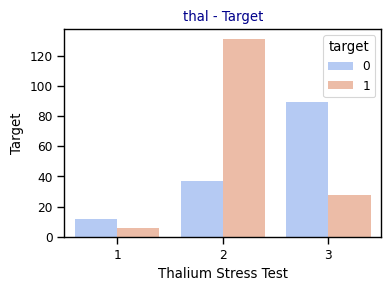

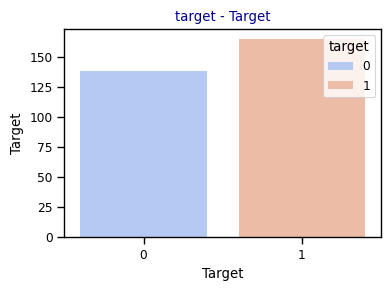

In [271]:
for n, m in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize=(4,3))
    sns.countplot(x = n, data = heart[categoric_var], hue='target', palette='coolwarm')
    plt.title(n + " - Target", color='darkblue')
    plt.xlabel(m)
    plt.ylabel("Target")
    plt.tight_layout()
    plt.show()

In [268]:
heart[categoric_var].corr().iloc[:, [-1]]


,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


### Normalization & Standardization

In [272]:
from sklearn.preprocessing import RobustScaler

In [273]:
scaler = RobustScaler()

In [274]:
scaled_data = scaler.fit_transform(heart[numeric_var])
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [278]:
heart_scaled = pd.DataFrame(scaled_data, columns=numeric_var)
heart_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


In [279]:
heart_scaled_target = pd.concat([heart_scaled, heart.loc[:, "target"]], axis = 1)
heart_scaled_target.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [280]:
melted_heart = pd.melt(heart_scaled_target, id_vars = "target", var_name = "variables", value_name = "value")
melted_heart

,target,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


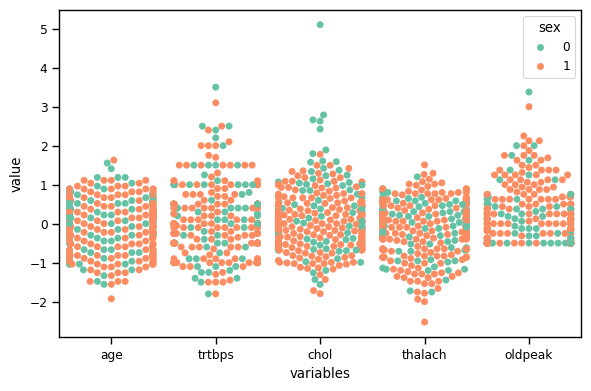

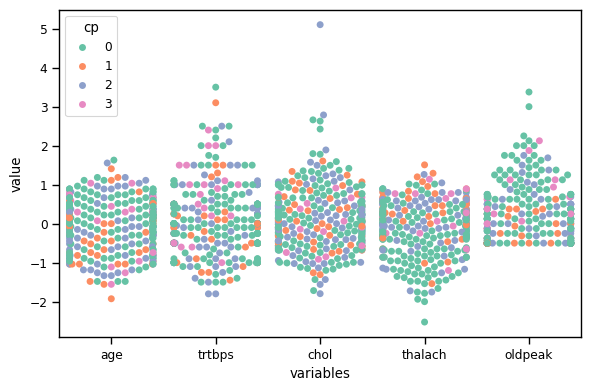

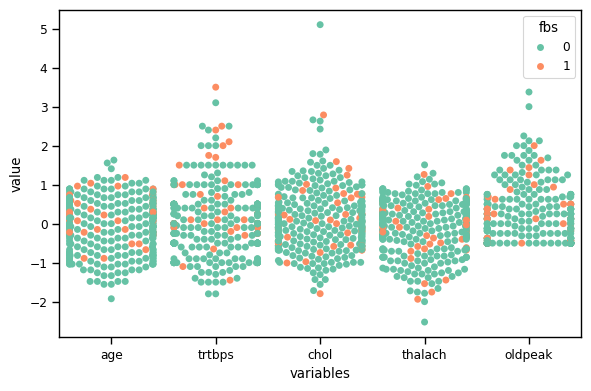

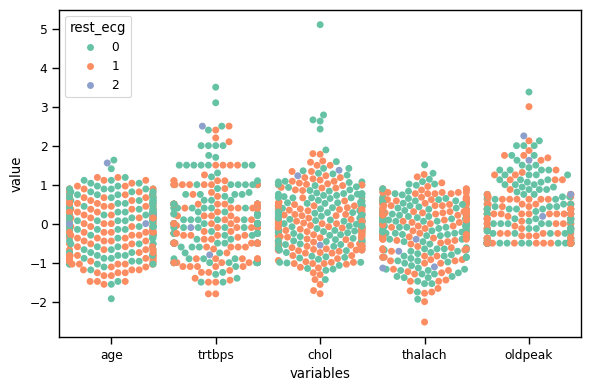

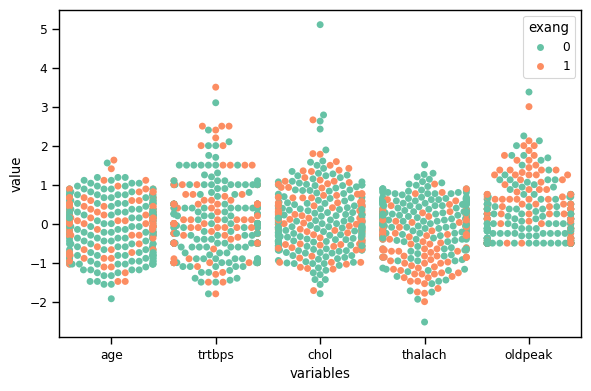

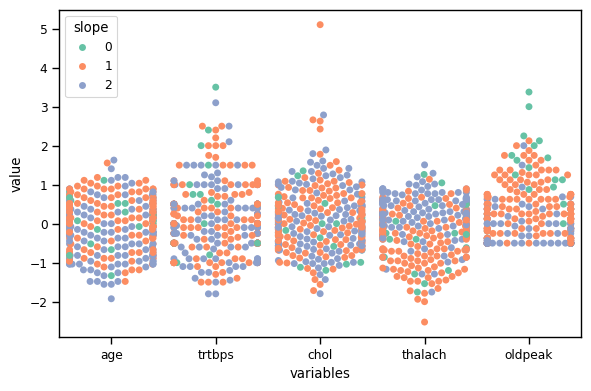

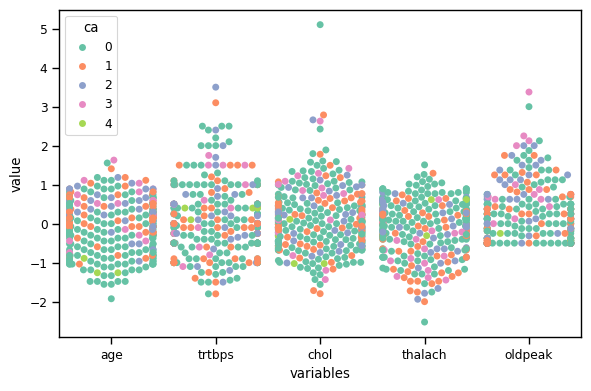

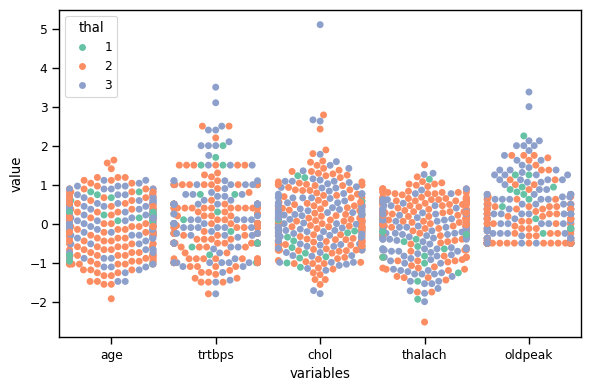

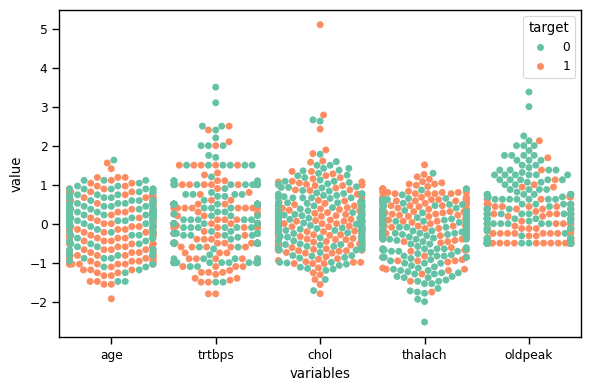

In [285]:
for i in heart[categoric_var]:                                                           
    heart_scaled_target = pd.concat([heart_scaled, heart.loc[:, i]], axis = 1)
    melted_heart = pd.melt(heart_scaled_target, id_vars = i, var_name = "variables", value_name = "value")
    plt.figure(figsize = (6, 4))
    sns.swarmplot(x = "variables", y = "value", hue = i, data = melted_heart, palette='Set2')
    
    plt.xlabel("variables")
    plt.ylabel("value")
    
    plt.tight_layout()
    plt.show()

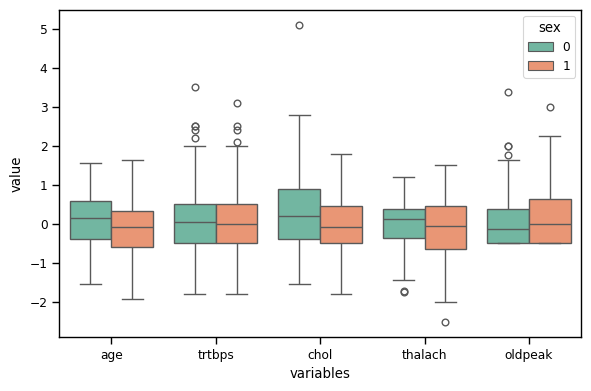

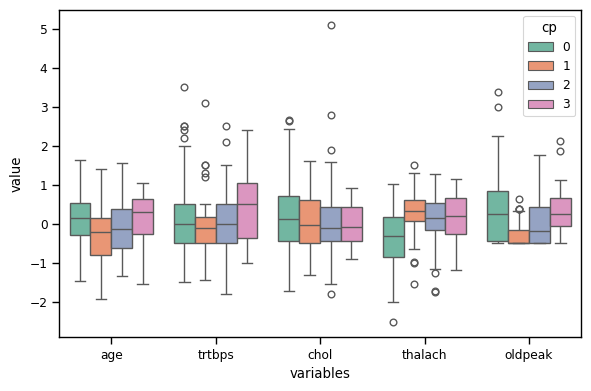

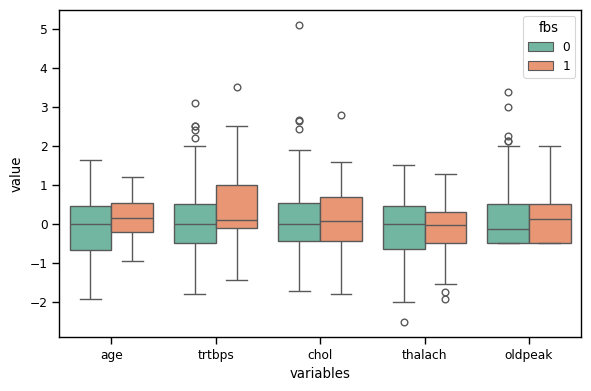

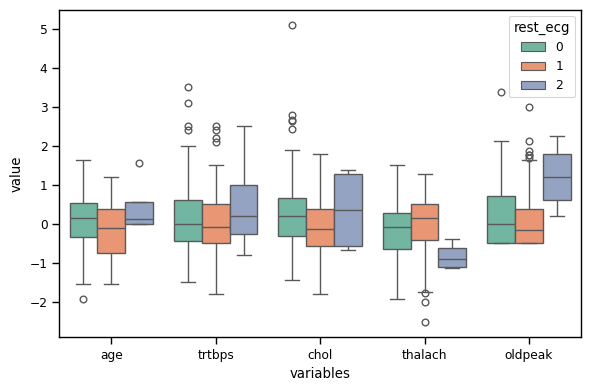

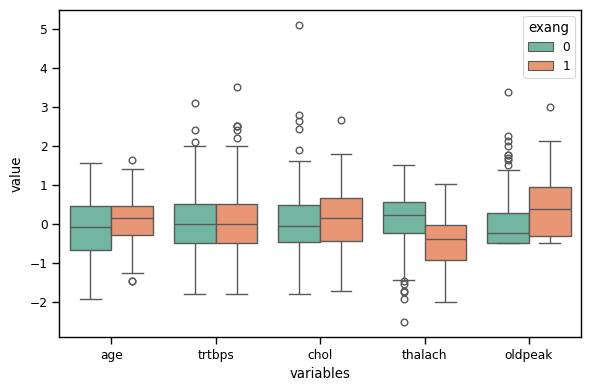

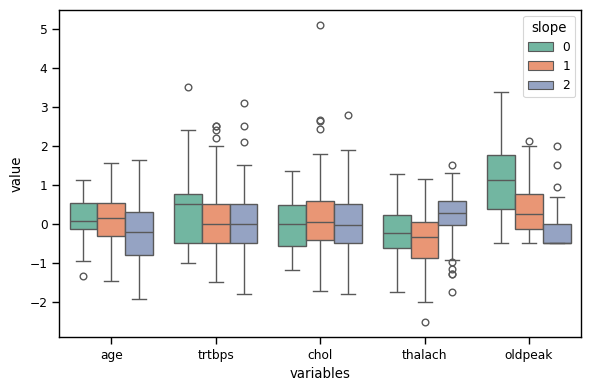

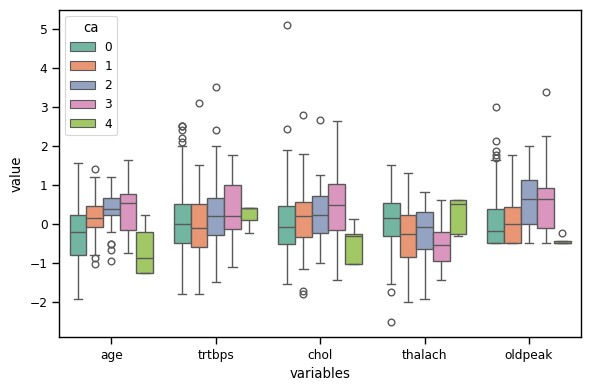

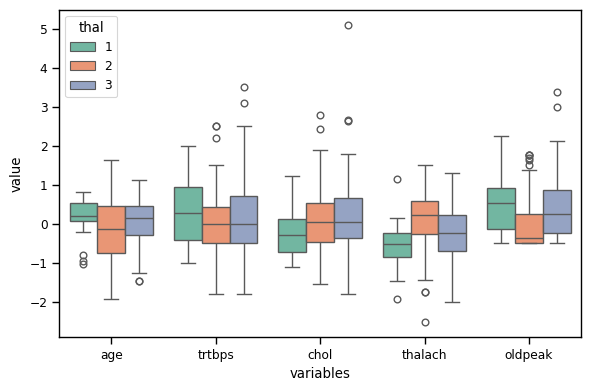

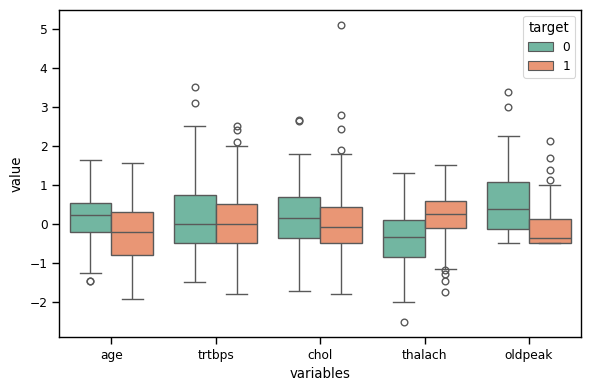

In [286]:
for i in heart[categoric_var]:                                                           
    heart_scaled_target = pd.concat([heart_scaled, heart.loc[:, i]], axis = 1)
    melted_heart = pd.melt(heart_scaled_target, id_vars = i, var_name = "variables", value_name = "value")
    plt.figure(figsize = (6, 4))
    sns.boxplot(x = "variables", y = "value", hue = i, data = melted_heart, palette='Set2')
    
    plt.xlabel("variables")
    plt.ylabel("value")
    
    plt.tight_layout()
    plt.show()

In [290]:
heart_scaled_cate = pd.concat([heart_scaled, heart[categoric_var]], axis = 1)
heart_scaled_cate.head()


,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1


In [291]:
heart_scaled_cate.corr()

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.066745,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.087866,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.115310,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210236,-0.430696
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757


<Axes: >

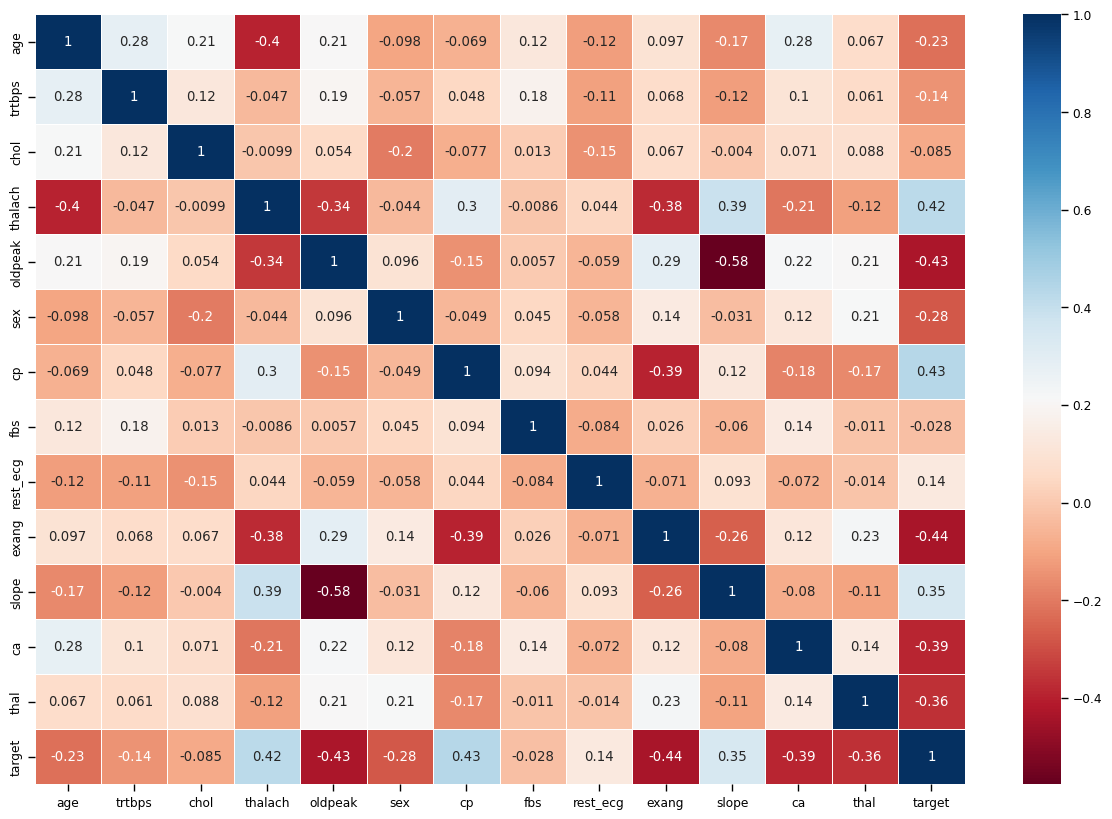

In [301]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = heart_scaled_cate.corr(), cmap = "RdBu", annot = True, linewidths = 0.5)

#### Filter out columns with low correlation

In [302]:
heart.drop(["chol", "fbs", "rest_ecg"], axis = 1, inplace = True)
heart.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


#### Visualize numerical variables outliers

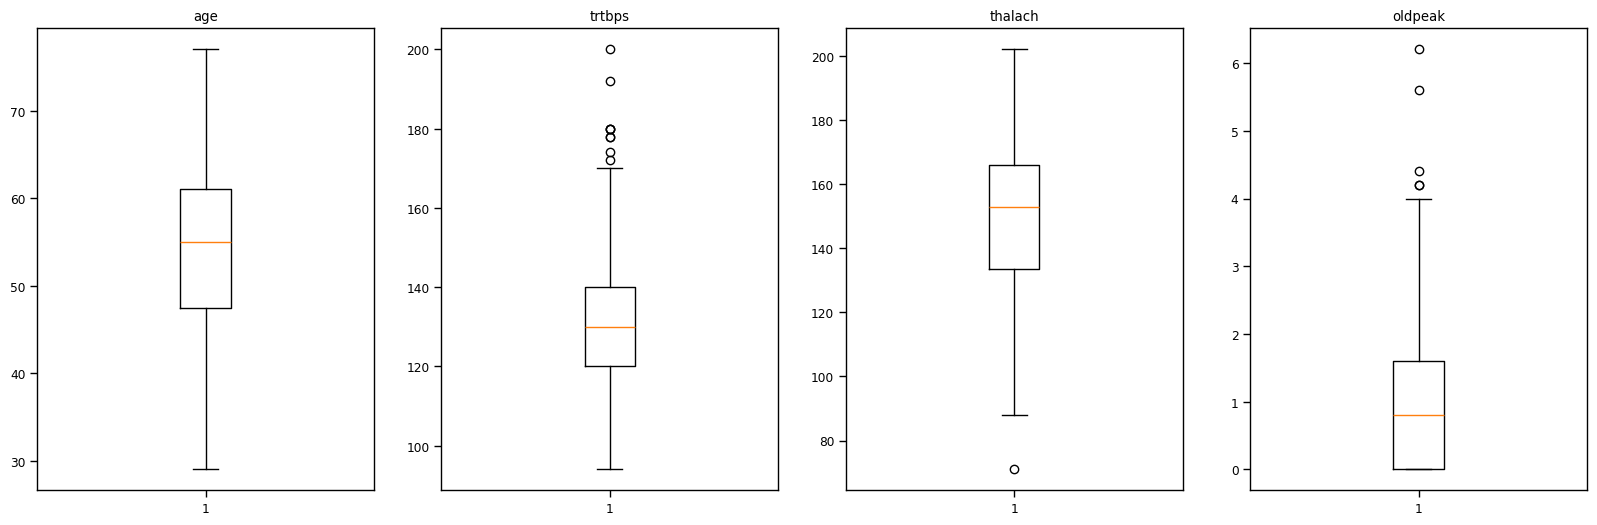

In [304]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(heart["age"])
ax1.set_title("age")

ax2.boxplot(heart["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(heart["thalach"])
ax3.set_title("thalach")

ax4.boxplot(heart["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

#### Deal with outliers
##### Z score method

In [307]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize 

In [308]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


In [312]:
heart[z_scores_trtbps > 2][["trtbps"]].min()


trtbps    170
dtype: int64

In [315]:
heart[heart["trtbps"] < 170].trtbps.max()

165

In [317]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
winsorize_percentile_trtbps

0.957095709570957

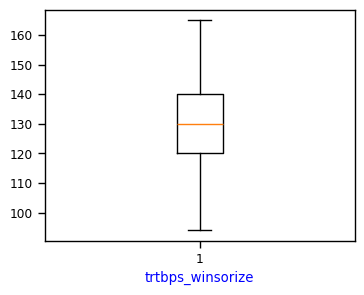

In [321]:
trtbps_winsorize = winsorize(heart.trtbps, (0, (1 - winsorize_percentile_trtbps)))
plt.subplots(figsize = (4, 3))
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [322]:
heart["trtbps_winsorize"] = trtbps_winsorize
heart.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


##### Interquantile method for non-normal distribution

In [324]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [325]:
thalach_out = iqr(heart, "thalach")
thalach_out

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2,0,120


In [326]:
heart.drop([272], axis = 0, inplace = True)
heart["thalach"][270:275]

270    144
271    145
273    156
274    118
275    168
Name: thalach, dtype: int64

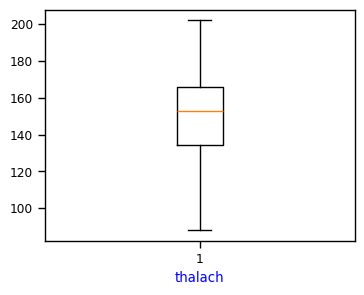

In [327]:
plt.subplots(figsize = (4, 3))
plt.boxplot(heart["thalach"])
plt.xlabel("thalach", color = "b")
plt.show()

In [329]:
iqr(heart, "oldpeak")

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3,1,165
204,62,0,0,160,145,0,6.2,0,3,3,0,160
221,55,1,0,140,111,1,5.6,0,0,3,0,140
250,51,1,0,140,122,1,4.2,1,3,3,0,140
291,58,1,0,114,140,0,4.4,0,3,1,0,114


In [330]:
heart[heart["oldpeak"] < 4.2].oldpeak.max()

4.0

In [331]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.9801980198019803


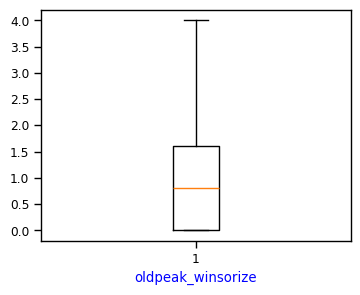

In [335]:
oldpeak_winsorize = winsorize(heart.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))
plt.subplots(figsize = (4, 3))
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [336]:
heart["oldpeak_winsorize"] = oldpeak_winsorize
heart.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2,1,120,0.6


In [337]:
heart.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)
heart.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


### Distributions for numberic data

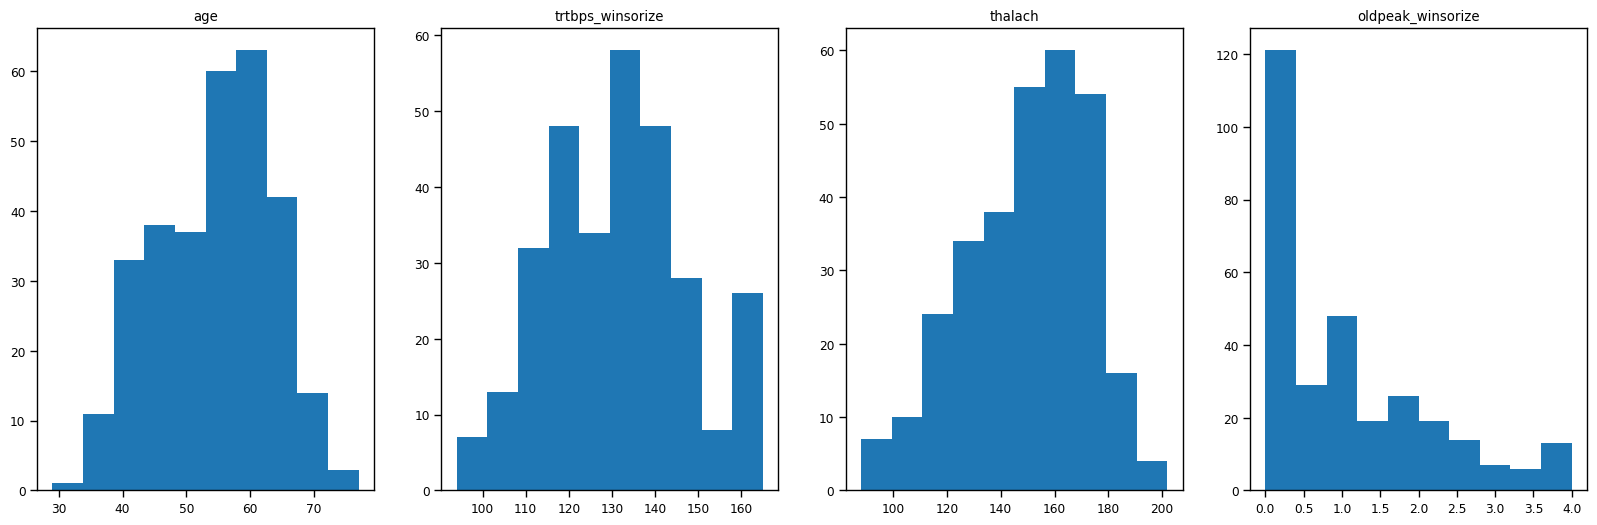

In [338]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.hist(heart["age"])
ax1.set_title("age")

ax2.hist(heart["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(heart["thalach"])
ax3.set_title("thalach")

ax4.hist(heart["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

##### Skewness of variables

In [340]:
heart[["age", "trtbps_winsorize", "thalach", "oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalach,-0.461611
oldpeak_winsorize,0.996036


##### Transformation on Unsymmetrical Data

In [341]:
heart["oldpeak_winsorize_log"] = np.log(heart["oldpeak_winsorize"])
heart["oldpeak_winsorize_sqrt"] = np.sqrt(heart["oldpeak_winsorize"])
heart[["oldpeak_winsorize", "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


In [342]:
heart.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis = 1, inplace = True)
heart.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


### One Hot Encoding Method for categorical variables

In [353]:
heart_copy = heart.copy()
categoric_var = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']
heart_copy = pd.get_dummies(heart_copy, columns = categoric_var[:-1], drop_first = True, dtype=int)
# heart_copy = heart_copy.astype(int)
heart_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,150,1,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0
1,37,187,1,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,172,1,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,1,0
3,56,178,1,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,1,0
4,57,163,1,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,1,0


#### Scale numeric variables

In [355]:
new_numeric_var = ["age", "thalach", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]
robust_scaler = RobustScaler()
heart_copy[new_numeric_var] = robust_scaler.fit_transform(heart_copy[new_numeric_var])
heart_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,0.581818,-0.095238,1,0.75,0.491851,1,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.309091,1.079365,1,0.00,0.771913,1,0,1,0,0,0,0,0,0,0,0,1,0
2,-1.018182,0.603175,1,0.00,0.228308,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0.072727,0.793651,1,-0.50,0.000000,1,1,0,0,0,0,1,0,0,0,0,1,0
4,0.145455,0.317460,1,-0.50,-0.094734,0,0,0,0,1,0,1,0,0,0,0,1,0


#### Separating Data into Test and Training Set

In [356]:
from sklearn.model_selection import train_test_split

In [357]:
X = heart_copy.drop(["target"], axis = 1)
y = heart_copy[["target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [358]:
X_train.head()

,age,thalach,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
201,0.363636,-0.380952,-0.25,0.615769,1,0,0,0,1,1,0,1,0,0,0,0,1
82,0.363636,0.222222,-1.40,-0.707107,0,0,1,0,0,0,1,1,0,0,0,1,0
187,-0.072727,-1.396825,-0.30,0.465497,1,0,0,0,1,1,0,1,0,0,0,0,1
259,-1.236364,0.920635,-0.50,0.833997,1,0,0,1,1,1,0,0,0,0,0,0,1
5,0.145455,-0.158730,0.50,-0.207107,1,0,0,0,0,1,0,0,0,0,0,0,0


In [359]:
y_train.head()

,target
201,0
82,1
187,0
259,0
5,1


In [360]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


### Modeling
#### Logistic Regression Algorithm

In [362]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8666666666666666


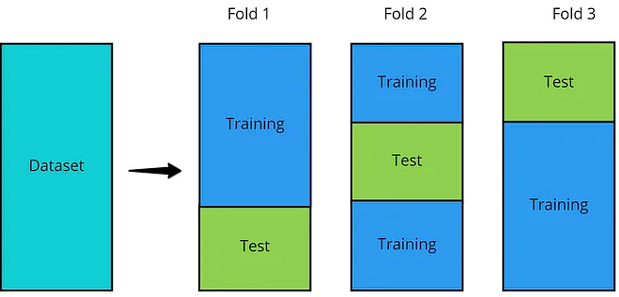

##### ROC Curve and AUC (Area Under Curve)

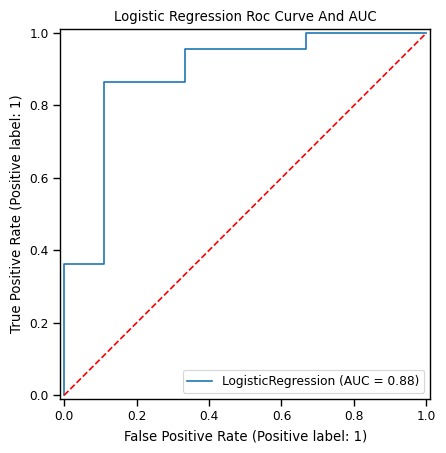

In [366]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

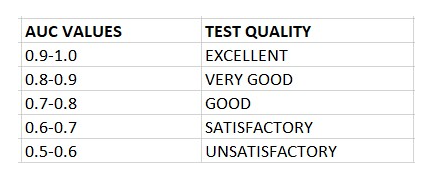

#### HyperParameters Optimization with GridSearchCV

In [367]:
from sklearn.model_selection import GridSearchCV
log_reg_new = LogisticRegression()
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# define grid search
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)
# execute
log_reg_grid.fit(X_train, y_train)
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'saga'}


In [368]:
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2.fit(X_train, y_train)
y_pred = log_reg_new2.predict(X_test)
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.8709677419354839


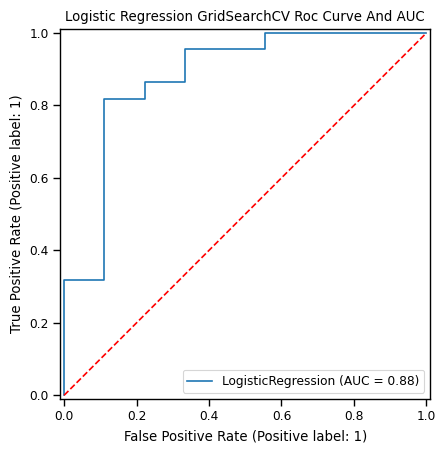

In [369]:
RocCurveDisplay.from_estimator(log_reg_new2, X_test, y_test)
plt.title("Logistic Regression GridSearchCV Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

### Decision Tree Algorithm

The test accuracy score of Decision Tree is: 0.8387096774193549
Cross-Validation Accuracy Scores 0.8333333333333333


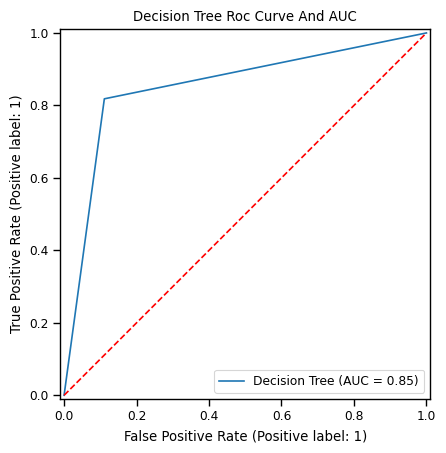

In [371]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state = 5)
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())
RocCurveDisplay.from_estimator(dec_tree, X_test, y_test, name = "Decision Tree")
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

### Support Vector Machine Algorithm

The test accuracy score of SVM is: 0.8709677419354839
Cross-Validation Accuracy Scores 0.8333333333333334


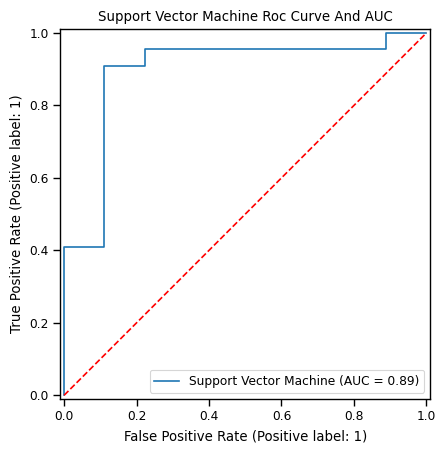

In [372]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 5)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())
RocCurveDisplay.from_estimator(svc_model, X_test, y_test, name = "Support Vector Machine")
plt.title("Support Vector Machine Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

### Random Forest Algorithm

The test accuracy score of Random Forest is 0.8387096774193549
Cross-Validation Accuracy Scores 0.8999999999999998


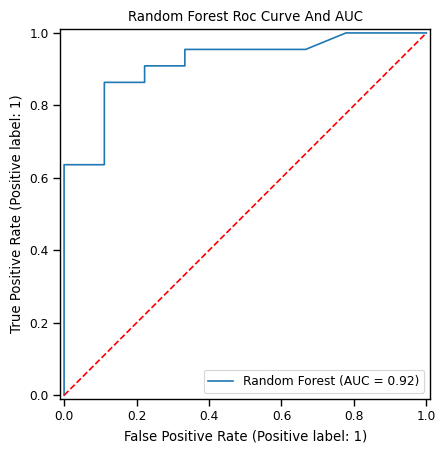

In [373]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 5)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())
RocCurveDisplay.from_estimator(random_forest, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

#### Hyperparameter Optimization(with GridSearchCV)

In [374]:
random_forest_new = RandomForestClassifier(random_state = 5)
parameters = {"n_estimators" : [50, 100, 150, 200], 
              "criterion" : ["gini", "entropy"], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False]}
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)
random_forest_grid.fit(X_train, y_train)
print("Best Parameters:", random_forest_grid.best_params_)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}


The test accuracy score of Random Forest after hyper-parameter tuning is: 0.9032258064516129


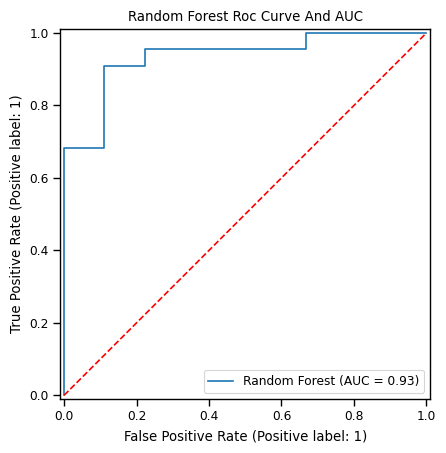

In [376]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "sqrt", n_estimators = 200, random_state = 5)
random_forest_new2.fit(X_train, y_train)
y_pred = random_forest_new2.predict(X_test)
print("The test accuracy score of Random Forest after hyper-parameter tuning is:", accuracy_score(y_test, y_pred))
RocCurveDisplay.from_estimator(random_forest_new2, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()